# Veriseti Hikayesi 
Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

https://www.kaggle.com/c/house-prices-advanced-regression-techniques


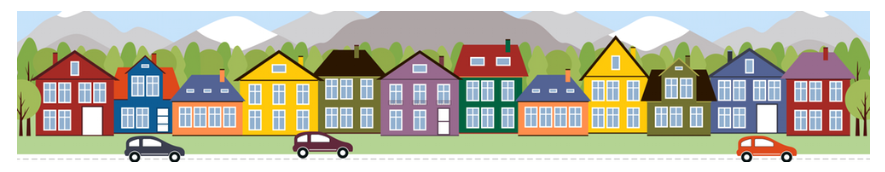


*	SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
*	MSSubClass: The building class
*	MSZoning: The general zoning classification
*	LotFrontage: Linear feet of street connected to property
*	LotArea: Lot size in square feet
*	Street: Type of road access
*	Alley: Type of alley access
*	LotShape: General shape of property
*	LandContour: Flatness of the property
*	Utilities: Type of utilities available
*	LotConfig: Lot configuration
*	LandSlope: Slope of property
*	Neighborhood: Physical locations within Ames city limits
*	Condition1: Proximity to main road or railroad
*	Condition2: Proximity to main road or railroad (if a second is present)
*	BldgType: Type of dwelling
*	HouseStyle: Style of dwelling
*	OverallQual: Overall material and finish quality
*	OverallCond: Overall condition rating
*	YearBuilt: Original construction date
*	YearRemodAdd: Remodel date
*	RoofStyle: Type of roof
*	RoofMatl: Roof material
*	Exterior1st: Exterior covering on house
*	Exterior2nd: Exterior covering on house (if more than one material)
*	MasVnrType: Masonry veneer type
*	MasVnrArea: Masonry veneer area in square feet
*	ExterQual: Exterior material quality
*	ExterCond: Present condition of the material on the exterior
*	Foundation: Type of foundation
*	BsmtQual: Height of the basement
*	BsmtCond: General condition of the basement
*	BsmtExposure: Walkout or garden level basement walls
*	BsmtFinType1: Quality of basement finished area
*	BsmtFinSF1: Type 1 finished square feet
*	BsmtFinType2: Quality of second finished area (if present)
*	BsmtFinSF2: Type 2 finished square feet
*	BsmtUnfSF: Unfinished square feet of basement area
*	TotalBsmtSF: Total square feet of basement area
*	Heating: Type of heating
*	HeatingQC: Heating quality and condition
*	CentralAir: Central air conditioning
*	Electrical: Electrical system
*	1stFlrSF: First Floor square feet
*	2ndFlrSF: Second floor square feet
*	LowQualFinSF: Low quality finished square feet (all floors)
*	GrLivArea: Above grade (ground) living area square feet
*	BsmtFullBath: Basement full bathrooms
*	BsmtHalfBath: Basement half bathrooms
*	FullBath: Full bathrooms above grade
*	HalfBath: Half baths above grade
*	Bedroom: Number of bedrooms above basement level
*	Kitchen: Number of kitchens
*	KitchenQual: Kitchen quality
*	TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
*	Functional: Home functionality rating
*	Fireplaces: Number of fireplaces
*	FireplaceQu: Fireplace quality
*	GarageType: Garage location
*	GarageYrBlt: Year garage was built
*	GarageFinish: Interior finish of the garage
*	GarageCars: Size of garage in car capacity
*	GarageArea: Size of garage in square feet
*	GarageQual: Garage quality
*	GarageCond: Garage condition
*	PavedDrive: Paved driveway
*	WoodDeckSF: Wood deck area in square feet
*	OpenPorchSF: Open porch area in square feet
*	EnclosedPorch: Enclosed porch area in square feet
*	3SsnPorch: Three season porch area in square feet
*	ScreenPorch: Screen porch area in square feet
*	PoolArea: Pool area in square feet
*	PoolQC: Pool quality
*	Fence: Fence quality
*	MiscFeature: Miscellaneous feature not covered in other categories
*	MiscVal: $Value of miscellaneous feature
*	MoSold: Month Sold
*	YrSold: Year Sold
*	SaleType: Type of sale
*	SaleCondition: Condition of sale


# Paketlerin indirilmesi

In [ ]:
# !pip install lightgbm
# !pip install catboost
# !pip install xgboost
# conda install -c conda-forge lightgbm
import sklearn
import seaborn as sns
import matplotlib.mlab as mlab 
import torch
    
############ LIBRARIES ############

# BASE
import numpy as np 
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt

# DATA PREPROCESSING
from sklearn import preprocessing
from sklearn.neighbors import LocalOutlierFactor 

# MODELING
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.exceptions import ConvergenceWarning

import xgboost
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

# MODEL TUNING
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [ ]:
# WARNINGS
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)


In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Veri Setinin Çekilmesi ve Birleştirilmesi

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
path1 = '/content/drive/MyDrive/Python/VBO/HousePriceTrain.csv'
path2 = '/content/drive/MyDrive/Python/VBO/HousePriceTest.csv'


Mounted at /content/drive


In [ ]:
df_train = pd.read_csv(path1)
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.000,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.000,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.000,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.000,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.000,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.000,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.000,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.000,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.000,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
df_test = pd.read_csv(path2)
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.000,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.000,TA,TA,CBlock,TA,TA,No,Rec,468.000,LwQ,144.000,270.000,882.000,GasA,TA,Y,SBrkr,896,0,0,896,0.000,0.000,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.000,Unf,1.000,730.000,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.000,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.000,TA,TA,CBlock,TA,TA,No,ALQ,923.000,Unf,0.000,406.000,1329.000,GasA,TA,Y,SBrkr,1329,0,0,1329,0.000,0.000,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.000,Unf,1.000,312.000,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.000,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.000,TA,TA,PConc,Gd,TA,No,GLQ,791.000,Unf,0.000,137.000,928.000,GasA,Gd,Y,SBrkr,928,701,0,1629,0.000,0.000,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.000,Fin,2.000,482.000,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.000,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.000,TA,TA,PConc,TA,TA,No,GLQ,602.000,Unf,0.000,324.000,926.000,GasA,Ex,Y,SBrkr,926,678,0,1604,0.000,0.000,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.000,Fin,2.000,470.000,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.000,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.000,Gd,TA,PConc,Gd,TA,No,ALQ,263.000,Unf,0.000,1017.000,1280.000,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.000,0.000,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.000,RFn,2.000,506.000,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [ ]:
df_train.shape, df_test.shape

((1460, 81), (1459, 80))

Train ve test setini birleştirelim

Eğer elimizdeki veri setinde birinde evlerin bilgileri, diğerinde yalnızca ID'ler ve Satış tutarları olsaydı bu iki veri setini merge ile birleştirmemiz gerekcekti. Ancak şu anda her iki veri setimizin de yapısı aynı, birini diğerininin altına getirecek şekilde birleştirmek istediğimiz için append fonksiyonunu kullanıyoruz. 

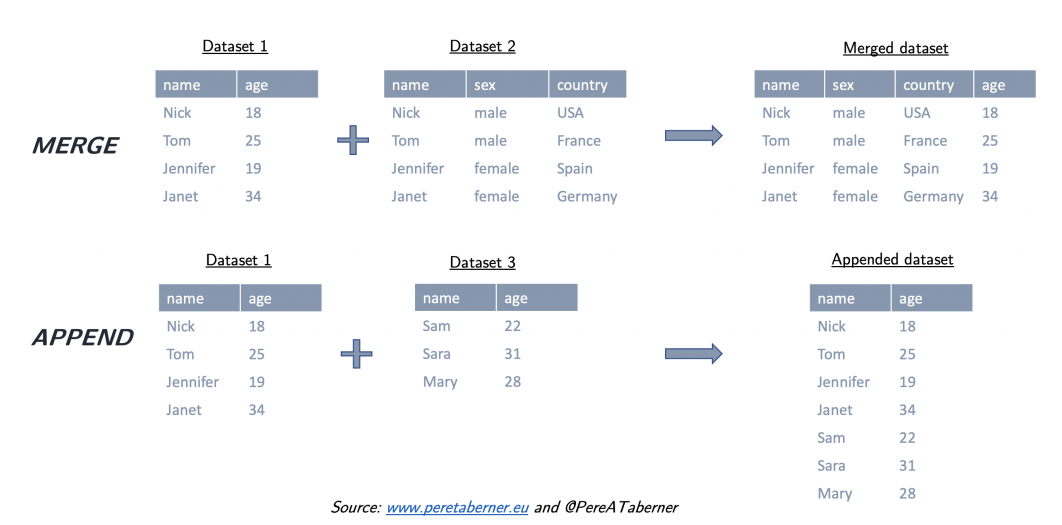 

In [ ]:
df = df_train.append(df_test).reset_index(drop=True)
df.shape

(2919, 81)

Birleştirdiğimiz test veri setinde SalePrice sütunu bulunmuyordu, bu değerlere NaN ataması yapıyor, kaç tane olduğunu yeniden kontrol etmek istersek nasıl bakabiliriz?

In [ ]:
df.value_counts(np.where(df["SalePrice"]>0,'1','0'))

1    1460
0    1459
dtype: int64

# Keşifçi Veri Analizi

Çok fazla değişkenimiz olduğu için gözle numerik ve kategorik değişkenleri yakalamamız çok zor olacağından daha önceden yazmış olduğumuz grab_col_names fonksiyonu bu veri setinde işimizi çok kolaylaştırabilir


In [ ]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    """
    grab_col_names for given dataframe

    :param dataframe:
    :param cat_th:
    :param car_th:
    :return:
    """

    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]

    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]

    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]

    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')

    # cat_cols + num_cols + cat_but_car = değişken sayısı.
    # num_but_cat cat_cols'un içerisinde zaten.
    # dolayısıyla tüm şu 3 liste ile tüm değişkenler seçilmiş olacaktır: cat_cols + num_cols + cat_but_car
    # num_but_cat sadece raporlama için verilmiştir.

    return cat_cols, cat_but_car, num_cols, num_but_cat


cat_cols, cat_but_car, num_cols, num_but_cat = grab_col_names(df)

Observations: 2919
Variables: 81
cat_cols: 52
num_cols: 28
cat_but_car: 1
num_but_cat: 10


In [ ]:
def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))

    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show()


for col in cat_cols:
    cat_summary(df, col)


         MSZoning  Ratio
RL           2265 77.595
RM            460 15.759
FV            139  4.762
RH             26  0.891
C (all)        25  0.856
      Street  Ratio
Pave    2907 99.589
Grvl      12  0.411
      Alley  Ratio
Grvl    120  4.111
Pave     78  2.672
     LotShape  Ratio
Reg      1859 63.686
IR1       968 33.162
IR2        76  2.604
IR3        16  0.548
     LandContour  Ratio
Lvl         2622 89.825
HLS          120  4.111
Bnk          117  4.008
Low           60  2.055
        Utilities  Ratio
AllPub       2916 99.897
NoSeWa          1  0.034
         LotConfig  Ratio
Inside        2133 73.073
Corner         511 17.506
CulDSac        176  6.029
FR2             85  2.912
FR3             14  0.480
     LandSlope  Ratio
Gtl       2778 95.170
Mod        125  4.282
Sev         16  0.548
        Condition1  Ratio
Norm          2511 86.023
Feedr          164  5.618
Artery          92  3.152
RRAn            50  1.713
PosN            39  1.336
RRAe            28  0.959
PosA   

In [104]:
df[num_cols].describe([0.05, 0.1, 0.25, 0.5, 0.75, 0.95, 0.99]).T

,count,mean,std,min,5%,10%,25%,50%,75%,95%,99%,max
Id,2915.000,1460.650,843.148,1.000,146.700,292.400,730.500,1462.000,2190.500,2773.300,2889.860,2919.000
MSSubClass,2915.000,57.148,42.541,20.000,20.000,20.000,20.000,50.000,70.000,160.000,190.000,190.000
LotFrontage,2915.000,68.901,20.310,21.000,35.000,47.000,60.000,68.000,78.000,104.000,130.860,173.000
LotArea,2915.000,9803.830,4330.281,1300.000,3182.000,4921.200,7474.000,9450.000,11554.500,17108.800,28300.700,28300.700
OverallQual,2915.000,6.084,1.404,1.000,4.000,5.000,5.000,6.000,7.000,8.000,9.000,10.000
...,...,...,...,...,...,...,...,...,...,...,...,...
NEW_HouseAge,2915.000,36.518,30.339,-1.000,1.000,1.000,7.000,35.000,55.000,92.000,110.000,136.000
NEW_RestorationAge,2915.000,23.549,20.898,-2.000,0.000,1.000,4.000,15.000,43.000,58.000,60.000,60.000
NEW_GarageAge,2915.000,6.823,18.404,-28.000,0.000,0.000,0.000,0.000,0.000,55.000,83.000,123.000
NEW_GarageRestorationAge,2915.000,10.301,18.036,0.000,0.000,0.000,0.000,0.000,15.000,50.000,78.000,107.000


In [ ]:
def num_summary(dataframe, numerical_col, plot=False):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(dataframe[numerical_col].describe(quantiles).T)

    if plot:
        dataframe[numerical_col].hist(bins=50)
        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.show()

    print("#####################################")


for col in num_cols:
    num_summary(df, col)


# Bağımlı değişkenin incelenmesi

In [ ]:
df["SalePrice"].describe([0.05, 0.1, 0.25, 0.5, 0.75, 0.8, 0.9, 0.95, 0.99]).T

count     1460.000
mean    180921.196
std      79442.503
min      34900.000
5%       88000.000
10%     106475.000
25%     129975.000
50%     163000.000
75%     214000.000
80%     230000.000
90%     278000.000
95%     326100.000
99%     442567.010
max     755000.000
Name: SalePrice, dtype: float64

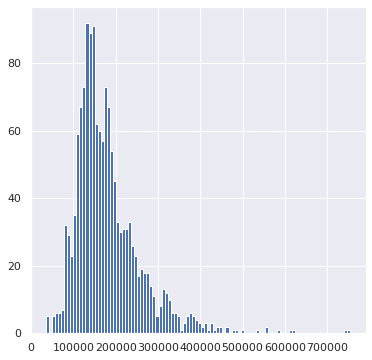

In [ ]:
sns.set(rc={'figure.figsize': (6, 6)})
df["SalePrice"].hist(bins=100)
plt.show()


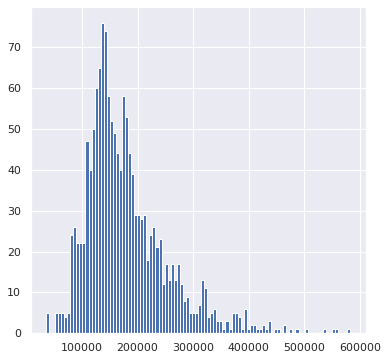

In [ ]:
df=df.loc[~(df.SalePrice>600000 ),]
df["SalePrice"].hist(bins=100)
plt.show()


Bağımlı değişkenin logaritmasının incelenmesi

In [ ]:
print("Çarpıklık: %f" % df['SalePrice'].skew())

Çarpıklık: 1.427011


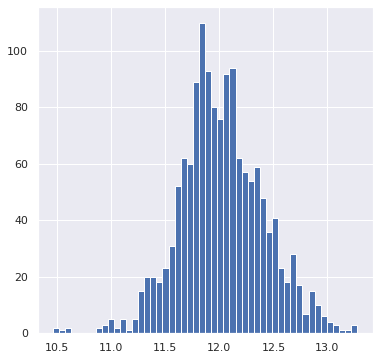

In [ ]:
np.log1p(df['SalePrice']).hist(bins=50)
plt.show()

In [98]:
print("Çarpıklık: %f" % np.log1p(df['SalePrice']).skew())

Çarpıklık: 0.029134


In [ ]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.000,Gd,TA,PConc,Gd,TA,No,GLQ,706.000,Unf,0.000,150.000,856.000,GasA,Ex,Y,SBrkr,856,854,0,1710,1.000,0.000,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.000,RFn,2.000,548.000,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.000
1,2,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.000,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.000,Unf,0.000,284.000,1262.000,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.000,1.000,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.000,RFn,2.000,460.000,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.000
2,3,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.000,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.000,Unf,0.000,434.000,920.000,GasA,Ex,Y,SBrkr,920,866,0,1786,1.000,0.000,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.000,RFn,2.000,608.000,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.000
3,4,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.000,TA,TA,BrkTil,TA,Gd,No,ALQ,216.000,Unf,0.000,540.000,756.000,GasA,Gd,Y,SBrkr,961,756,0,1717,1.000,0.000,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.000,Unf,3.000,642.000,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.000
4,5,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.000,Gd,TA,PConc,Gd,TA,Av,GLQ,655.000,Unf,0.000,490.000,1145.000,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.000,0.000,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.000,RFn,3.000,836.000,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.000


# Korelasyon İncelemesi

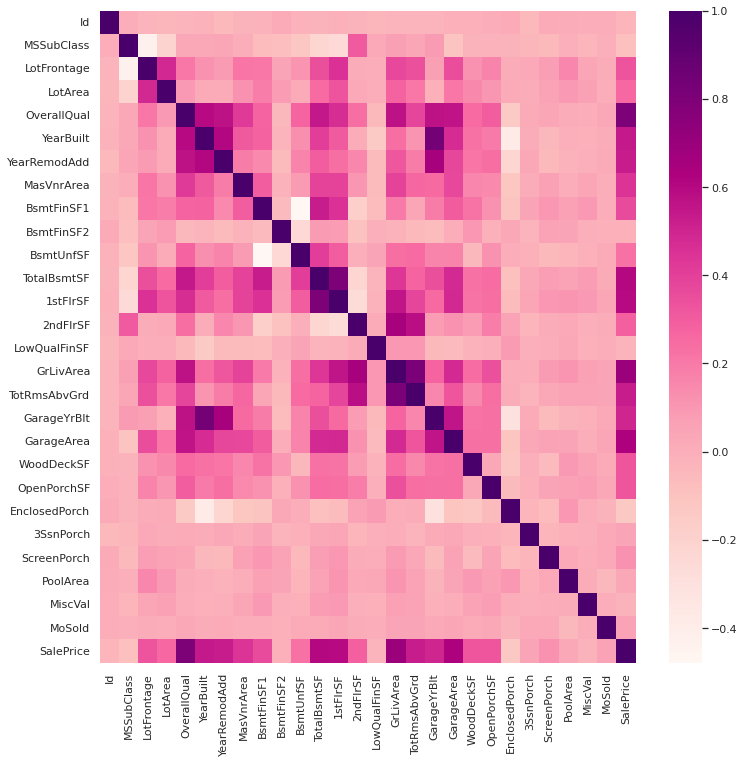

In [ ]:
corr = df[num_cols].corr()

sns.set(rc={'figure.figsize': (12, 12)})
sns.heatmap(corr, cmap="RdPu")
plt.show(block=True)

In [ ]:
def high_correlated_cols(dataframe, plot=False, corr_th=0.70):
    corr = dataframe.corr()
    cor_matrix = corr.abs()
    upper_triangle_matrix = cor_matrix.where(np.triu(np.ones(cor_matrix.shape), k=1).astype(np.bool))
    drop_list = [col for col in upper_triangle_matrix.columns if any(upper_triangle_matrix[col] > corr_th)]
    if plot:
        import seaborn as sns
        import matplotlib.pyplot as plt
        sns.set(rc={'figure.figsize': (15, 15)})
        sns.heatmap(corr, cmap="RdBu")
        plt.show()
    return drop_list


high_correlated_cols(df, plot=False)

['1stFlrSF', 'TotRmsAbvGrd', 'GarageYrBlt', 'GarageArea', 'SalePrice']

# Aykırı gözlem analizi

In [ ]:
# Aykırı değerlerin baskılanması
def outlier_thresholds(dataframe, variable, low_quantile=0.10, up_quantile=0.90):
    quantile_one = dataframe[variable].quantile(low_quantile)
    quantile_three = dataframe[variable].quantile(up_quantile)
    interquantile_range = quantile_three - quantile_one
    up_limit = quantile_three + 1.5 * interquantile_range
    low_limit = quantile_one - 1.5 * interquantile_range
    return low_limit, up_limit

# Aykırı değer kontrolü
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

# Aykırı değerlerin baskılanması
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit



In [ ]:
for col in num_cols:
    if col != "SalePrice":
      print(col, check_outlier(df, col))


Id False
MSSubClass False
LotFrontage True
LotArea True
OverallQual False
YearBuilt False
YearRemodAdd False
MasVnrArea True
BsmtFinSF1 True
BsmtFinSF2 True
BsmtUnfSF False
TotalBsmtSF True
1stFlrSF True
2ndFlrSF False
LowQualFinSF True
GrLivArea True
TotRmsAbvGrd True
GarageYrBlt True
GarageArea False
WoodDeckSF True
OpenPorchSF True
EnclosedPorch True
3SsnPorch True
ScreenPorch True
PoolArea True
MiscVal True
MoSold False


In [ ]:
for col in num_cols:
    if col != "SalePrice":
        replace_with_thresholds(df,col)

# Eksik Değer Analizi


In [ ]:

def missing_values_table(dataframe, na_name=False):
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]
    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)
    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])
    print(missing_df, end="\n")

    if na_name:
        return na_columns

missing_values_table(df)


             n_miss  ratio
PoolQC         2906 99.690
MiscFeature    2810 96.400
Alley          2717 93.210
Fence          2345 80.450
SalePrice      1459 50.050
...             ...    ...
BsmtFinSF1        1  0.030
Exterior2nd       1  0.030
Exterior1st       1  0.030
SaleType          1  0.030
Electrical        1  0.030

[35 rows x 2 columns]


Bazı değişkenlerdeki boş değerler evin o özelliğe sahip olmadığını ifade etmektedir

In [ ]:
no_cols = ["Alley","BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2","FireplaceQu",
           "GarageType","GarageFinish","GarageQual","GarageCond","PoolQC","Fence","MiscFeature"]


# Kolonlardaki boşlukların "No" ifadesi ile doldurulması
for col in no_cols:
    df[col].fillna("No",inplace=True)

missing_values_table(df)

             n_miss  ratio
SalePrice      1459 50.050
LotFrontage     486 16.670
GarageYrBlt     159  5.450
MasVnrType       24  0.820
MasVnrArea       23  0.790
...             ...    ...
KitchenQual       1  0.030
GarageCars        1  0.030
GarageArea        1  0.030
SaleType          1  0.030
TotalBsmtSF       1  0.030

[21 rows x 2 columns]


In [ ]:
df.shape

(2915, 81)

Geriye kalan değişkenlere eksik gözlem aksiyonlarımızı alabiliriz.

In [ ]:
# Bu fonsksiyon eksik değerlerin median veya mean ile doldurulmasını sağlar
def quick_missing_imp(data, num_method="median", cat_length=20, target="SalePrice"):
    variables_with_na = [col for col in data.columns if
                         data[col].isnull().sum() > 0]  # Eksik değere sahip olan değişkenler listelenir

    temp_target = data[target]

    print("# BEFORE")
    print(data[variables_with_na].isnull().sum(), "\n\n")  # Uygulama öncesi değişkenlerin eksik değerlerinin sayısı

    # değişken object ve sınıf sayısı cat_lengthe eşit veya altındaysa boş değerleri mode ile doldur
    data = data.apply(lambda x: x.fillna(x.mode()[0]) if (x.dtype == "O" and len(x.unique()) <= cat_length) else x,
                      axis=0)

    # num_method mean ise tipi object olmayan değişkenlerin boş değerleri ortalama ile dolduruluyor
    if num_method == "mean":
        data = data.apply(lambda x: x.fillna(x.mean()) if x.dtype != "O" else x, axis=0)
    # num_method median ise tipi object olmayan değişkenlerin boş değerleri ortalama ile dolduruluyor
    elif num_method == "median":
        data = data.apply(lambda x: x.fillna(x.median()) if x.dtype != "O" else x, axis=0)

    data[target] = temp_target

    print("# AFTER \n Imputation method is 'MODE' for categorical variables!")
    print(" Imputation method is '" + num_method.upper() + "' for numeric variables! \n")
    print(data[variables_with_na].isnull().sum(), "\n\n")

    return data


df = quick_missing_imp(df, num_method="median", cat_length=17)

# BEFORE
MSZoning          4
LotFrontage     486
Utilities         2
Exterior1st       1
Exterior2nd       1
               ... 
GarageYrBlt     159
GarageCars        1
GarageArea        1
SaleType          1
SalePrice      1459
Length: 21, dtype: int64 


# AFTER 
 Imputation method is 'MODE' for categorical variables!
 Imputation method is 'MEDIAN' for numeric variables! 

MSZoning          0
LotFrontage       0
Utilities         0
Exterior1st       0
Exterior2nd       0
               ... 
GarageYrBlt       0
GarageCars        0
GarageArea        0
SaleType          0
SalePrice      1459
Length: 21, dtype: int64 




# Feature Engineering

**Rare yapılacaklar:** MSZoning, LotShape, ExterCond, GarageQual, BsmtFinType2 , Condition1 , BldgType 

**Çıkartılacaklar:** Street, Alley, LandContour, Utilities, LandSlope, Condition2, Heating, CentralAir, Functional, PoolQC, MiscFeature, Neighborhood, KitchenAbvGr

In [ ]:
def rare_analyser(dataframe, target, cat_cols):
    for col in cat_cols:
        print(col, ":", len(dataframe[col].value_counts()))
        print(pd.DataFrame({"COUNT": dataframe[col].value_counts(),
                            "RATIO": dataframe[col].value_counts() / len(dataframe),
                            "TARGET_MEAN": dataframe.groupby(col)[target].mean()}), end="\n\n\n")

rare_analyser(df, "SalePrice", cat_cols)


MSZoning : 5
         COUNT  RATIO  TARGET_MEAN
C (all)     25  0.009    74528.000
FV         139  0.048   214014.062
RH          26  0.009   131558.375
RL        2265  0.777   189285.172
RM         460  0.158   126316.830


Street : 2
      COUNT  RATIO  TARGET_MEAN
Grvl     12  0.004   130190.500
Pave   2903  0.996   179742.859


Alley : 3
      COUNT  RATIO  TARGET_MEAN
Grvl    120  0.041   122219.080
No     2717  0.932   181984.843
Pave     78  0.027   168000.585


LotShape : 4
     COUNT  RATIO  TARGET_MEAN
IR1    964  0.331   202117.810
IR2     76  0.026   239833.366
IR3     16  0.005   216036.500
Reg   1859  0.638   164754.818


LandContour : 4
     COUNT  RATIO  TARGET_MEAN
Bnk    117  0.040   143104.079
HLS    120  0.041   231533.940
Low     60  0.021   203661.111
Lvl   2618  0.898   178641.343


Utilities : 2
        COUNT  RATIO  TARGET_MEAN
AllPub   2914  1.000   179567.553
NoSeWa      1  0.000   137500.000


LotConfig : 5
         COUNT  RATIO  TARGET_MEAN
Corner     509  

*MSZoning* değişkeni

Yaşam alanının Zone'unu belirtmektedir. Residential High grubu az olduğu için ile Residential Medium ile birleştirebiliriz.
Diğer iki grubun sayıları düşük olduğu için daha anlamlı hale gelebilmesi adına bir araya getirebiliriz.


In [ ]:
df["MSZoning"].value_counts()

RL         2265
RM          460
FV          139
RH           26
C (all)      25
Name: MSZoning, dtype: int64

In [ ]:
df.loc[(df["MSZoning"] == "RH"), "MSZoning"] = "RM"
df.loc[(df["MSZoning"] == "FV"), "MSZoning"] = "FV + C (all)"
df.loc[(df["MSZoning"] == "C (all)"), "MSZoning"] = "FV + C (all)"
df["MSZoning"].value_counts()

RL              2265
RM               486
FV + C (all)     164
Name: MSZoning, dtype: int64

*Lot Area* değişkeni

Evin ft2'sini göstermektedir. 200K ya kadar değer vardır ancak çoğunluk alt değerlerde olduğundan bizim için anlam yaratabilmesi için gruplandırabiliriz.

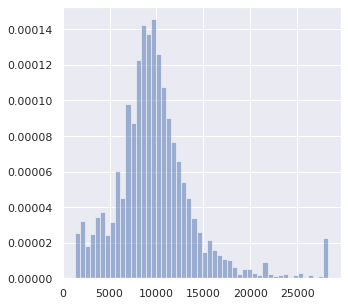

In [ ]:
sns.set(rc={'figure.figsize': (5, 5)})
bins = 50
plt.hist(df["LotArea"],bins, alpha=0.5, density=True)
plt.show()

In [ ]:
df["LotArea"].max()

28300.699999999997

In [ ]:
df['LotArea'].mean()

9803.829914236707

In [ ]:
New_LotArea =  pd.Series(["Studio","Small", "Middle", "Large","Dublex","Luxury"], dtype = "category")
df["New_LotArea"] = New_LotArea
df.loc[(df["LotArea"] <= 2000), "New_LotArea"] = New_LotArea[0]
df.loc[(df["LotArea"] > 2000) & (df["LotArea"] <= 4000), "New_LotArea"] = New_LotArea[1]
df.loc[(df["LotArea"] > 4000) & (df["LotArea"] <= 6000), "New_LotArea"] = New_LotArea[2]
df.loc[(df["LotArea"] > 6000) & (df["LotArea"] <= 8000), "New_LotArea"] = New_LotArea[3]
df.loc[(df["LotArea"] > 10000) & (df["LotArea"] <= 12000), "New_LotArea"] = New_LotArea[4]
df.loc[df["LotArea"] > 12000 ,"New_LotArea"] = New_LotArea[5]

In [ ]:
df["New_LotArea"].value_counts()

Luxury    620
Dublex    594
Large     463
Middle    216
Small     157
Studio     58
Name: New_LotArea, dtype: int64

*LotShape* değişkeni

Mülkün genel şeklini göstermektedir. 4 tane grubu olmasından da bizim için reg ve IR olarak iki grubu olması yeterlidir.        
  * Reg	Regular	
  * IR1	Slightly irregular
  * IR2	Moderately Irregular
  * IR3	Irregular

In [ ]:
df["LotShape"].value_counts()

Reg    1859
IR1     964
IR2      76
IR3      16
Name: LotShape, dtype: int64

In [ ]:
df.loc[(df["LotShape"] == "IR1"), "LotShape"] = "IR"
df.loc[(df["LotShape"] == "IR2"), "LotShape"] = "IR"
df.loc[(df["LotShape"] == "IR3"), "LotShape"] = "IR"

In [ ]:
df["LotShape"].value_counts()

Reg    1859
IR     1056
Name: LotShape, dtype: int64

*ExterCond:* değişkeni

Malzemenin dış cephedeki durumunu vermektedir
  *     Ex	Excellent
  *     Gd	Good
  *     TA	Average/Typical
  *     Fa	Fair
  *     Po	Poor

In [ ]:
df["ExterCond"].value_counts()

TA    2535
Gd     298
Fa      67
Ex      12
Po       3
Name: ExterCond, dtype: int64

In [ ]:
df["ExterCond"] = np.where(df.ExterCond.isin(["Fa", "Po"]), "FaPo", df["ExterCond"])
df["ExterCond"] = np.where(df.ExterCond.isin(["Ex", "Gd"]), "ExGd", df["ExterCond"])
df['ExterCond'].value_counts()

TA      2535
ExGd     310
FaPo      70
Name: ExterCond, dtype: int64

*GarageQual* değişkeni

Garajın kalitesini göstermektedir.
  *     Ex	Excellent
  *     Gd	Good
  *     TA	Typical/Average
  *     Fa	Fair
  *     Po	Poor
  *     NA	No Garage

In [ ]:
df['GarageQual'].value_counts()

TA    2600
No     159
Fa     124
Gd      24
Po       5
Ex       3
Name: GarageQual, dtype: int64

In [ ]:
df["GarageQual"] = np.where(df.GarageQual.isin(["Fa", "Po"]), "FaPo", df["GarageQual"])
df["GarageQual"] = np.where(df.GarageQual.isin(["Ex", "Gd"]), "ExGd", df["GarageQual"])
df["GarageQual"] = np.where(df.GarageQual.isin(["ExGd", "TA"]), "ExGd", df["GarageQual"])
df['GarageQual'].value_counts()

ExGd    2627
No       159
FaPo     129
Name: GarageQual, dtype: int64

*BsmtFinType1 ve BsmtFinType2* değişkeni

Birinci ve ikinci bodrumun bitmiş bölümünün kalitesi

  *     GLQ	Good Living Quarters
  *     ALQ	Average Living Quarters
  *     BLQ	Below Average Living Quarters	
  *     Rec	Average Rec Room
  *     LwQ	Low Quality
  *     Unf	Unfinshed
  *     NA	No Basement

In [ ]:
df['BsmtFinType1'].value_counts()

Unf    851
GLQ    845
ALQ    429
Rec    288
BLQ    269
LwQ    154
No      79
Name: BsmtFinType1, dtype: int64

In [ ]:
df['BsmtFinType2'].value_counts()

Unf    2489
Rec     105
LwQ      87
No       80
BLQ      68
ALQ      52
GLQ      34
Name: BsmtFinType2, dtype: int64

In [ ]:
df["BsmtFinType1"] = np.where(df.BsmtFinType1.isin(["GLQ", "ALQ"]), "RareExcellent", df["BsmtFinType1"])
df["BsmtFinType1"] = np.where(df.BsmtFinType1.isin(["BLQ", "LwQ", "Rec"]), "RareGood", df["BsmtFinType1"])
df["BsmtFinType2"] = np.where(df.BsmtFinType2.isin(["GLQ", "ALQ"]), "RareExcellent", df["BsmtFinType2"])
df["BsmtFinType2"] = np.where(df.BsmtFinType2.isin(["BLQ", "LwQ", "Rec"]), "RareGood", df["BsmtFinType2"])
df['BsmtFinType1'].value_counts()

RareExcellent    1274
Unf               851
RareGood          711
No                 79
Name: BsmtFinType1, dtype: int64

In [ ]:
df['BsmtFinType2'].value_counts()

Unf              2489
RareGood          260
RareExcellent      86
No                 80
Name: BsmtFinType2, dtype: int64

*Condition1* değişkeni

Anayola ya da demiryoluna yakınlığı göstermektedir. Bitişik olanları bir grup, normali bir grup ve diğerlerini mesafeli olduğu için bir grup yapabiliriz

   *    Artery	Adjacent to arterial street
   *    Feedr	Adjacent to feeder street	
   *    Norm	Normal	
   *    RRNn	Within 200' of North-South Railroad
   *    RRAn	Adjacent to North-South Railroad
   *    PosN	Near positive off-site feature--park, greenbelt, etc.
   *    PosA	Adjacent to postive off-site feature
   *    RRNe	Within 200' of East-West Railroad
   *    RRAe	Adjacent to East-West Railroad

In [ ]:
df['Condition1'].value_counts()

Norm      2507
Feedr      164
Artery      92
RRAn        50
PosN        39
RRAe        28
PosA        20
RRNn         9
RRNe         6
Name: Condition1, dtype: int64

In [ ]:
df.loc[(df["Condition1"] == "Feedr") | (df["Condition1"] == "Artery") |(df["Condition1"] == "RRAn") |(df["Condition1"] == "PosA") | (df["Condition1"] == "RRAe"),"Condition1"] = "AdjacentCondition"
df.loc[(df["Condition1"] == "RRNn") | (df["Condition1"] == "PosN") |(df["Condition1"] == "RRNe"),"Condition1"] = "WithinCondition"
df.loc[(df["Condition1"] == "Norm") ,"Condition1"] = "NormalCondition"
df['Condition1'].value_counts()

NormalCondition      2507
AdjacentCondition     354
WithinCondition        54
Name: Condition1, dtype: int64

*Condition2* değişkeni

Ikinci yol varsa onu göstermektedir ancak grupların çeşitliliği çok düşük olduğu için veri setinden çıkartılması tercih edilmiştir

In [ ]:
df['Condition2'].value_counts()

Norm      2885
Feedr       13
Artery       5
PosN         4
PosA         4
RRNn         2
RRAn         1
RRAe         1
Name: Condition2, dtype: int64

In [ ]:
df.drop('Condition2',axis=1,inplace=True)

*BldgType* değişkeni

Binanın türünü vermektedir

  *     1Fam	Single-family Detached	-> Tek aile
  *     2FmCon	Two-family Conversion; originally built as one-family dwelling -> Aslında tek aile
  *     Duplx	Duplex
  *     TwnhsE	Townhouse End Unit
  *     TwnhsI	Townhouse Inside Unit

In [ ]:
df['BldgType'].value_counts()

1Fam      2421
TwnhsE     227
Duplex     109
Twnhs       96
2fmCon      62
Name: BldgType, dtype: int64

In [ ]:
df["BldgType"] = np.where(df.BldgType.isin(["1Fam", "2fmCon"]), "Normal", df["BldgType"])
df["BldgType"] = np.where(df.BldgType.isin(["TwnhsE", "Twnhs", "Duplex"]), "Big", df["BldgType"])
df['BldgType'].value_counts()

Normal    2483
Big        432
Name: BldgType, dtype: int64

*TotalQual* değişkeni

Kaliteyi gösteren değişkenlerle toplam bir kalite göstergesi değişkeni oluşturalım

In [ ]:
df["TotalQual"] = df[["OverallQual", "OverallCond", "ExterQual", "ExterCond", "BsmtCond", "BsmtFinType1",
                      "BsmtFinType2", "HeatingQC", "KitchenQual", "Functional", "FireplaceQu", "GarageQual", "GarageCond", "Fence"]].sum(axis = 1)


*Overall* değişkeni

Evin genel durumu ve kullanılan materyallerin kalitesinden bir değişken oluşturalım


In [ ]:
df["Overall"] = df[["OverallQual", "OverallCond"]].sum(axis = 1)

*NEW_TotalFlrSF* değişkeni

Evin toplamdaki kapladığı yüzey alanı

In [ ]:
df["NEW_TotalFlrSF"] = df["1stFlrSF"] + df["2ndFlrSF"]

*NEW_TotalBsmtFin* değişkeni

Tamamlanmış toplam bodrum alanı

In [ ]:
df["NEW_TotalBsmtFin"] = df.BsmtFinSF1+df.BsmtFinSF2

*NEW_PorchArea* değişkeni

Ev dışında kalan alan toplamı

In [ ]:
df["NEW_PorchArea"] = df.OpenPorchSF + df.EnclosedPorch + df.ScreenPorch + df["3SsnPorch"] + df.WoodDeckSF

*NEW_TotalHouseArea* değişkeni

Evin toplam alanı

In [ ]:
df["NEW_TotalHouseArea"] = df.NEW_TotalFlrSF + df.TotalBsmtSF

*NEW_TotalSqFeet* değişkeni

Evin toplam kapladığı ft2

In [ ]:
df["NEW_TotalSqFeet"] = df.GrLivArea + df.TotalBsmtSF

*NEW_TotalFullBath* ve *NEW_TotalHalfBath* değişkenleri

Ev içerisindeki topla yarım ve tam banyo sayıları

In [ ]:
df["NEW_TotalFullBath"] = df.BsmtFullBath + df.FullBath
df["NEW_TotalHalfBath"] = df.BsmtHalfBath + df.HalfBath

*NEW_TotalBath* değişkeni

Ev içerisinde bulunan toplam banyo sayısını ifade etmektedir

In [ ]:
df["NEW_TotalBath"] = df["NEW_TotalFullBath"] + (df["NEW_TotalHalfBath"]*0.5)

*Lot Ratio* değişkenleri

Yaşanan alan, toplam ev alanı ve garaj alanının arazinin ne kadarını kapladığı

In [ ]:
df["NEW_LotRatio"] = df.GrLivArea / df.LotArea

df["NEW_RatioArea"] = df.NEW_TotalHouseArea / df.LotArea

df["NEW_GarageLotRatio"] = df.GarageArea / df.LotArea

*Tarihler arasındaki farklar* değişkenleri

Restorasyon ile yapım yılı arasında geçen yıl, Garajın yapım yılıyla evin yapım yılı arasındaki fark gibi değişkenler

In [ ]:
df["NEW_Restoration"] = df.YearRemodAdd - df.YearBuilt

df["NEW_HouseAge"] = df.YrSold - df.YearBuilt

df["NEW_RestorationAge"] = df.YrSold - df.YearRemodAdd

df["NEW_GarageAge"] = df.GarageYrBlt - df.YearBuilt

df["NEW_GarageRestorationAge"] = np.abs(df.GarageYrBlt - df.YearRemodAdd)

df["NEW_GarageSold"] = df.YrSold - df.GarageYrBlt

In [ ]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,New_LotArea,TotalQual,Overall,NEW_TotalFlrSF,NEW_TotalBsmtFin,NEW_PorchArea,NEW_TotalHouseArea,NEW_TotalSqFeet,NEW_TotalFullBath,NEW_TotalHalfBath,NEW_TotalBath,NEW_LotRatio,NEW_RatioArea,NEW_GarageLotRatio,NEW_Restoration,NEW_HouseAge,NEW_RestorationAge,NEW_GarageAge,NEW_GarageRestorationAge,NEW_GarageSold
0,1.000,60,RL,65.000,8450.000,Pave,No,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,NormalCondition,Normal,2Story,7.000,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.000,Gd,TA,PConc,Gd,TA,No,RareExcellent,706.000,Unf,0.000,150.000,856.000,GasA,Ex,Y,SBrkr,856.000,854.000,0,1710.000,1.000,0.000,2,1,3,1,Gd,8.000,Typ,0,No,Attchd,2003.000,RFn,2.000,548.000,ExGd,TA,Y,0,61.000,0,0,0,0,No,No,No,0,2.000,2008,WD,Normal,208500.000,Studio,12.000,12.000,1710.000,706.000,61.000,2566.000,2566.000,3.000,1.000,3.500,0.202,0.304,0.065,0,5,5,0.000,0.000,5.000
1,2.000,20,RL,80.000,9600.000,Pave,No,Reg,Lvl,AllPub,FR2,Gtl,Veenker,AdjacentCondition,Normal,1Story,6.000,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.000,TA,TA,CBlock,Gd,TA,Gd,RareExcellent,978.000,Unf,0.000,284.000,1262.000,GasA,Ex,Y,SBrkr,1262.000,0.000,0,1262.000,0.000,1.000,2,0,3,1,TA,6.000,Typ,1,TA,Attchd,1976.000,RFn,2.000,460.000,ExGd,TA,Y,298,0.000,0,0,0,0,No,No,No,0,5.000,2007,WD,Normal,181500.000,Small,14.000,14.000,1262.000,978.000,298.000,2524.000,2524.000,2.000,1.000,2.500,0.131,0.263,0.048,0,31,31,0.000,0.000,31.000
2,3.000,60,RL,68.000,11250.000,Pave,No,IR,Lvl,AllPub,Inside,Gtl,CollgCr,NormalCondition,Normal,2Story,7.000,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.000,Gd,TA,PConc,Gd,TA,Mn,RareExcellent,486.000,Unf,0.000,434.000,920.000,GasA,Ex,Y,SBrkr,920.000,866.000,0,1786.000,1.000,0.000,2,1,3,1,Gd,6.000,Typ,1,TA,Attchd,2001.000,RFn,2.000,608.000,ExGd,TA,Y,0,42.000,0,0,0,0,No,No,No,0,9.000,2008,WD,Normal,223500.000,Dublex,12.000,12.000,1786.000,486.000,42.000,2706.000,2706.000,3.000,1.000,3.500,0.159,0.241,0.054,1,7,6,0.000,1.000,7.000
3,4.000,70,RL,60.000,9550.000,Pave,No,IR,Lvl,AllPub,Corner,Gtl,Crawfor,NormalCondition,Normal,2Story,7.000,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.000,TA,TA,BrkTil,TA,Gd,No,RareExcellent,216.000,Unf,0.000,540.000,756.000,GasA,Gd,Y,SBrkr,961.000,756.000,0,1717.000,1.000,0.000,1,0,3,1,Gd,7.000,Typ,1,Gd,Detchd,1998.000,Unf,3.000,642.000,ExGd,TA,Y,0,35.000,272,0,0,0,No,No,No,0,2.000,2006,WD,Abnorml,140000.000,Large,12.000,12.000,1717.000,216.000,307.000,2473.000,2473.000,2.000,0.000,2.000,0.180,0.259,0.067,55,91,36,83.000,28.000,8.000
4,5.000,60,RL,84.000,14260.000,Pave,No,IR,Lvl,AllPub,FR2,Gtl,NoRidge,NormalCondition,Normal,2Story,8.000,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.000,Gd,TA,PConc,Gd,TA,Av,RareExcellent,655.000,Unf,0.000,490.000,1145.000,GasA,Ex,Y,SBrkr,1145.000,1053.000,0,2198.000,1.000,0.000,2,1,4,1,Gd,9.000,Typ,1,TA,Attchd,2000.000,RFn,3.000,836.000,ExGd,TA,Y,192,84.000,0,0,0,0,No,No,No,0,12.000,2008,WD,Normal,250000.000,Luxury,13.000,13.000,2198.000,655.000,276.000,3343.000,3343.000,3.000,1.000,3.500,0.154,0.234,0.059,0,8,8,0.000,0.000,8.000


Yukarıda rare analyze yaptığımızda veri setinde gereksiz gördüğümüz değişkenleri veri setinden çıkartalım

In [ ]:
drop_list = ["Street", "Alley", "LandContour", "Utilities" ,"LandSlope","Heating", "PoolQC", "MiscFeature","Neighborhood","KitchenAbvGr", "CentralAir", "Functional"]

# drop_list'teki değişkenlerin düşürülmesi
df.drop(drop_list, axis=1, inplace=True)

# Encoding Islemleri

In [ ]:
cat_cols, cat_but_car, num_cols, num_but_cat = grab_col_names(df)


Observations: 2915
Variables: 88
cat_cols: 48
num_cols: 40
cat_but_car: 0
num_but_cat: 17


In [ ]:
def label_encoder(dataframe, binary_col):
    labelencoder = preprocessing.LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe

binary_cols = [col for col in df.columns if df[col].dtypes == "O"
               and len(df[col].unique()) == 2]

for col in binary_cols:
    label_encoder(df, col)


In [ ]:
def one_hot_encoder(dataframe, categorical_cols, drop_first=False):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe

df = one_hot_encoder(df, cat_cols, drop_first=True)

# Modelleme

In [ ]:
missing_values_table(df)

           n_miss  ratio
SalePrice    1459 50.050


In [ ]:
# Log dönüşümünün gerçekleştirilmesi
train_df = df[df['SalePrice'].notnull()]
test_df = df[df['SalePrice'].isnull()].drop("SalePrice", axis=1)

y = np.log1p(df[df['SalePrice'].notnull()]['SalePrice'])
X = train_df.drop(["Id", "SalePrice"], axis=1)

In [ ]:
# Verinin eğitim ve tet verisi olarak bölünmesi
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=17)

models = [('LR', LinearRegression()),
          ("Ridge", Ridge()),
          ("Lasso", Lasso()),
          ("ElasticNet", ElasticNet()),
          ('KNN', KNeighborsRegressor()),
          ('CART', DecisionTreeRegressor()),
          ('RF', RandomForestRegressor()),
          ('SVR', SVR()),
          ('GBM', GradientBoostingRegressor()),
          ("XGBoost", XGBRegressor(objective='reg:squarederror')),
          ("LightGBM", LGBMRegressor())]
          # ("CatBoost", CatBoostRegressor(verbose=False))]

for name, regressor in models:
    rmse = np.mean(np.sqrt(-cross_val_score(regressor, X, y, cv=5, scoring="neg_mean_squared_error")))
    print(f"RMSE: {round(rmse, 4)} ({name}) ")

RMSE: 0.165 (LR) 
RMSE: 0.1474 (Ridge) 
RMSE: 0.1835 (Lasso) 
RMSE: 0.1769 (ElasticNet) 
RMSE: 0.2127 (KNN) 
RMSE: 0.2074 (CART) 
RMSE: 0.1402 (RF) 
RMSE: 0.1959 (SVR) 
RMSE: 0.1298 (GBM) 
RMSE: 0.1291 (XGBoost) 
RMSE: 0.1332 (LightGBM) 


In [88]:
xgboost_model = XGBRegressor(objective='reg:squarederror')

rmse = np.mean(np.sqrt(-cross_val_score(xgboost_model,
                                        X, y, cv=5, scoring="neg_mean_squared_error")))


xgboost_params = {"learning_rate": [0.1, 0.01, 0.03],
                  "max_depth": [5, 6, 8],
                  "n_estimators": [100, 200, 300],
                  "colsample_bytree": [0.5, 0.8, 1]}

xgboost_gs_best = GridSearchCV(xgboost_model,
                            xgboost_params,
                            cv=3,
                            n_jobs=-1,
                            verbose=True).fit(X_train, y_train)

Fitting 3 folds for each of 81 candidates, totalling 243 fits


In [89]:
xgboost_gs_best.best_params_

{'colsample_bytree': 0.5,
 'learning_rate': 0.03,
 'max_depth': 6,
 'n_estimators': 300}

In [90]:
final_model = xgboost_model.set_params(**xgboost_gs_best.best_params_).fit(X, y)

rmse = np.mean(np.sqrt(-cross_val_score(final_model, X, y, cv=5, scoring="neg_mean_squared_error")))


In [94]:
round(rmse, 4)

0.1276

# Modelin test edilmesi

In [92]:
xgboost_tuned = XGBRegressor(objective='reg:squarederror',**xgboost_gs_best.best_params_).fit(X_train, y_train)
y_pred = xgboost_tuned.predict(X_test)


# Yapılan LOG dönüşümünün tersinin (inverse'nin) alınması
new_y= np.expm1(y_pred)
new_y_test= np.expm1(y_test)

np.sqrt(mean_squared_error(new_y_test, new_y))

# RMSE : 23535.96597150668

23535.96597150668

In [105]:
df['SalePrice'].mean()

179538.66002747254

In [102]:
test_df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,TotRmsAbvGrd,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,MoSold,TotalQual,Overall,NEW_TotalFlrSF,NEW_TotalBsmtFin,NEW_PorchArea,NEW_TotalHouseArea,NEW_TotalSqFeet,NEW_TotalBath,NEW_LotRatio,NEW_RatioArea,NEW_GarageLotRatio,NEW_Restoration,NEW_HouseAge,NEW_RestorationAge,NEW_GarageAge,NEW_GarageRestorationAge,NEW_GarageSold,MSZoning_RL,MSZoning_RM,LotShape_1,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Condition1_NormalCondition,Condition1_WithinCondition,BldgType_1,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_FaPo,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No,BsmtQual_TA,BsmtCond_Gd,BsmtCond_No,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_RareExcellent,BsmtFinType1_RareGood,BsmtFinType1_Unf,BsmtFinType2_RareExcellent,BsmtFinType2_RareGood,BsmtFinType2_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No,GarageFinish_No,GarageFinish_RFn,GarageFinish_Unf,GarageQual_FaPo,GarageQual_No,GarageCond_Fa,GarageCond_Gd,GarageCond_No,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_No,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,BsmtFullBath_1.0,BsmtFullBath_2.0,BsmtFullBath_3.0,BsmtHalfBath_1.0,BsmtHalfBath_2.0,FullBath_1,FullBath_2,FullBath_3,FullBath_4,HalfBath_1,HalfBath_2,BedroomAbvGr_1,BedroomAbvGr_2,BedroomAbvGr_3,BedroomAbvGr_4,BedroomAbvGr_5,BedroomAbvGr_6,BedroomAbvGr_8,Fireplaces_1,Fireplaces_2,Fireplaces_3,Fireplaces_4,GarageCars_1.0,GarageCars_2.0,GarageCars_3.0,GarageCars_4.0,GarageCars_5.0,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010,New_LotArea_Large,New_LotArea_Luxury,New_LotArea_Middle,New_LotArea_Small,New_LotArea_Studio,NEW_TotalFullBath_1.0,NEW_TotalFullBath_2.0,NEW_TotalFullBath_3.0,NEW_TotalFullBath_4.0,NEW_TotalFullBath_6.0,NEW_TotalHalfBath_1.0,NEW_TotalHalfBath_2.0,NEW_TotalHalfBath_3.0,NEW_TotalHalfBath_4.0
1460,1461.000,20,80.000,11622.000,5.000,1961,1961,0.000,468.000,144.000,270.000,882.000,896.000,0.000,896.000,5.000,1961.000,730.000,140,0.000,0,6.000,11.000,11.000,896.000,612.000,140.000,1778.000,1778.000,1.000,0.077,0.153,0.063,0,49,49,0.000,0.000,49.000,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0

In [ ]:
submission_df = pd.DataFrame()
submission_df['Id'] = test_df["Id"].astype("Int32")

y_pred_sub = xgboost_tuned.predict(test_df.drop("Id", axis=1))

y_pred_sub = np.expm1(y_pred_sub)

submission_df['SalePrice'] = y_pred_sub

submission_df.to_csv('/content/drive/MyDrive/Python/VBO/submission.csv', index=False)

In [ ]:
from google.colab import files
files.download("/content/drive/MyDrive/Python/VBO/submission.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>